# Impute All Missing Values Using a Single Function
`Author:` [Usman Tariq](https://github.com/USM811)\
`Email:` usm6329@gmail.com

![Imputation of Missing Values](Data-Imputation.webp)

## Purpose
In this notebook:
+ I construced a function by using the `Iterative Imputer` and `RandomForest` algorithm which will impute the missing data in numerical and categorical features simultaneously.
+ I handle the outliers through binning based on quantiles.
+ Handle the unusual anomalities in numerical features.
+ Finally, make sure the dataset is ready for any Machine Learning Algorithm.

[UCI Heart Disease Data](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data) is used for this purpose.

## About Data
#### Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

#### Content
Column Descriptions:

+ `id` (Unique id for each patient)
+ `age` (Age of the patient in years)
+ `origin` (place of study)
+ `sex` (Male/Female)
+ `cp` chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
+ `trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
+ `chol` (serum cholesterol in mg/dl)
+ `fbs` (if fasting blood sugar > 120 mg/dl)
+ `restecg` (resting electrocardiographic results)
+ -- `Values` [normal, stt abnormality, lv hypertrophy]
+ `thalach` maximum heart rate achieved
+ `exang` exercise-induced angina (True/ False)
+ `oldpeak` ST depression induced by exercise relative to rest
+ `slope` the slope of the peak exercise ST segment
+ `ca` number of major vessels (0-3) colored by fluoroscopy
+ `thal` [normal; fixed defect; reversible defect]
+ `num` the predicted attribute

#### Acknowledgements
Creators:
+ Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
+ University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
+ University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
+ V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

#### Relevant Papers:
+ Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
+ David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."
+ Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.

#### Citation Request:
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. They would be:

+ Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
+ University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
+ University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
+ V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

## 1.0 - Import Libraries

In [22]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import train_test_split

# import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# import warnings
import warnings
warnings.filterwarnings('ignore')

## 2.0 - Load Dataset

In [23]:
# Importing Dataset
df = pd.read_csv('heart_disease_uci.csv')

## 3.0 - Data Overview

&emsp;**3.0.1 - Inspect Data Dimenstions and Types**

In [24]:
# Display first 5 rows.
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [25]:
# shape of the dataset
df.shape

(920, 16)

In [26]:
# Display information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


&emsp; **Observations - 3.0.1**
> + There are `920` rows, means the data of `920` human being.
> + There are total `16` columns in the dataset, including `id`, `dataset (location of the patient)`.
> + There are total `8 categoric features` [`'sex'`, `'dataset'`, `'cp'`, `'fbs'`, `'restecg'`, `'exang'`, `'slope'`, `'thal'`] and `8 numeric features` [`'id'`, `'age'`, `'trestbps'`, `'chol'`, `'thalch'`, `'oldpeak'`, `'ca'`, `'num'`], in the dataset.
> + The target feature `num` represents the ordinal numeric severity of the heart disease (`[0, 1, 2, 3, 4]`).
> + There are `13` features or `medical parameters` (excluding `id` and `dataset`), which will be used to predict the target feature `num` (the intensity of the heart disease).

&emsp;**3.0.2 - Inspect Missing Data**

In [27]:
# Identify the columns in which the data is missing.
round((df.isnull().sum()[df.isnull().sum()>0]/len(df)*100),1).sort_values(ascending=False)

ca          66.4
thal        52.8
slope       33.6
fbs          9.8
oldpeak      6.7
trestbps     6.4
thalch       6.0
exang        6.0
chol         3.3
restecg      0.2
dtype: float64

&emsp;**Observations - 3.0.2**
> + There are `10` features in which the data is missing.
> + There are `7` features in which the `percentage of missing data` is `less than 10%`
> + There are `3` features [`'slope'`, `'thal'`, `'ca'`] in which the `percentaage of missing data` is `high` (Around `33%`, `52%`, and `66%` respectively).

&emsp;**3.0.3 - Inspect Categorical Features**

In [28]:
# Get a short summary of categorical features.
df.describe(include='object')

,sex,dataset,cp,fbs,restecg,exang,slope,thal
count,920,920,920,830,918,865,611,434
unique,2,4,4,2,3,2,3,3
top,Male,Cleveland,asymptomatic,False,normal,False,flat,normal
freq,726,304,496,692,551,528,345,196


In [29]:
# Get the list of categorical columns.
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Identify the unique values in each categorical column.
for col in cat_cols:
    print(col, ":", df[col].unique(), '\n')

sex : ['Male' 'Female'] 

dataset : ['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach'] 

cp : ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina'] 

fbs : [True False nan] 

restecg : ['lv hypertrophy' 'normal' 'st-t abnormality' nan] 

exang : [False True nan] 

slope : ['downsloping' 'flat' 'upsloping' nan] 

thal : ['fixed defect' 'normal' 'reversable defect' nan] 



&emsp;**Observations - 3.0.3**
> + The `78.9%` patients are `Male`, and `21.1%` patients are `Female`, in the dataset.
> 
> + There are `spaces` in the categorical-values of the features `'dataset'`, `'cp'`, `'restecg'`, and `'thal'`, which need to be replaced with either a `dash` sign or an `underscore` sign. Otherwise, these values will raise errors at later stages.
> 
> + The feature `slope` can be considered to be ordinal.
> 
>   + `'Downsloping'` represents a `downward slope`.
>   + `'flat'` represents `no significant slope`.
>   + `'upsloping'` represents an `upward slope`.
>   + `This ordering` implies a natural progression `from downsloping to flat to upsloping`.
>
> + The feature `thal` can be considered to be ordinal.
> 
>   + `'normal'` represents `no abnormality`.
>   + `'reversible defect'` indicates a `potentially reversible abnormality`.
>   + `'Fixed defect'` represents a `permanent abnormality`.

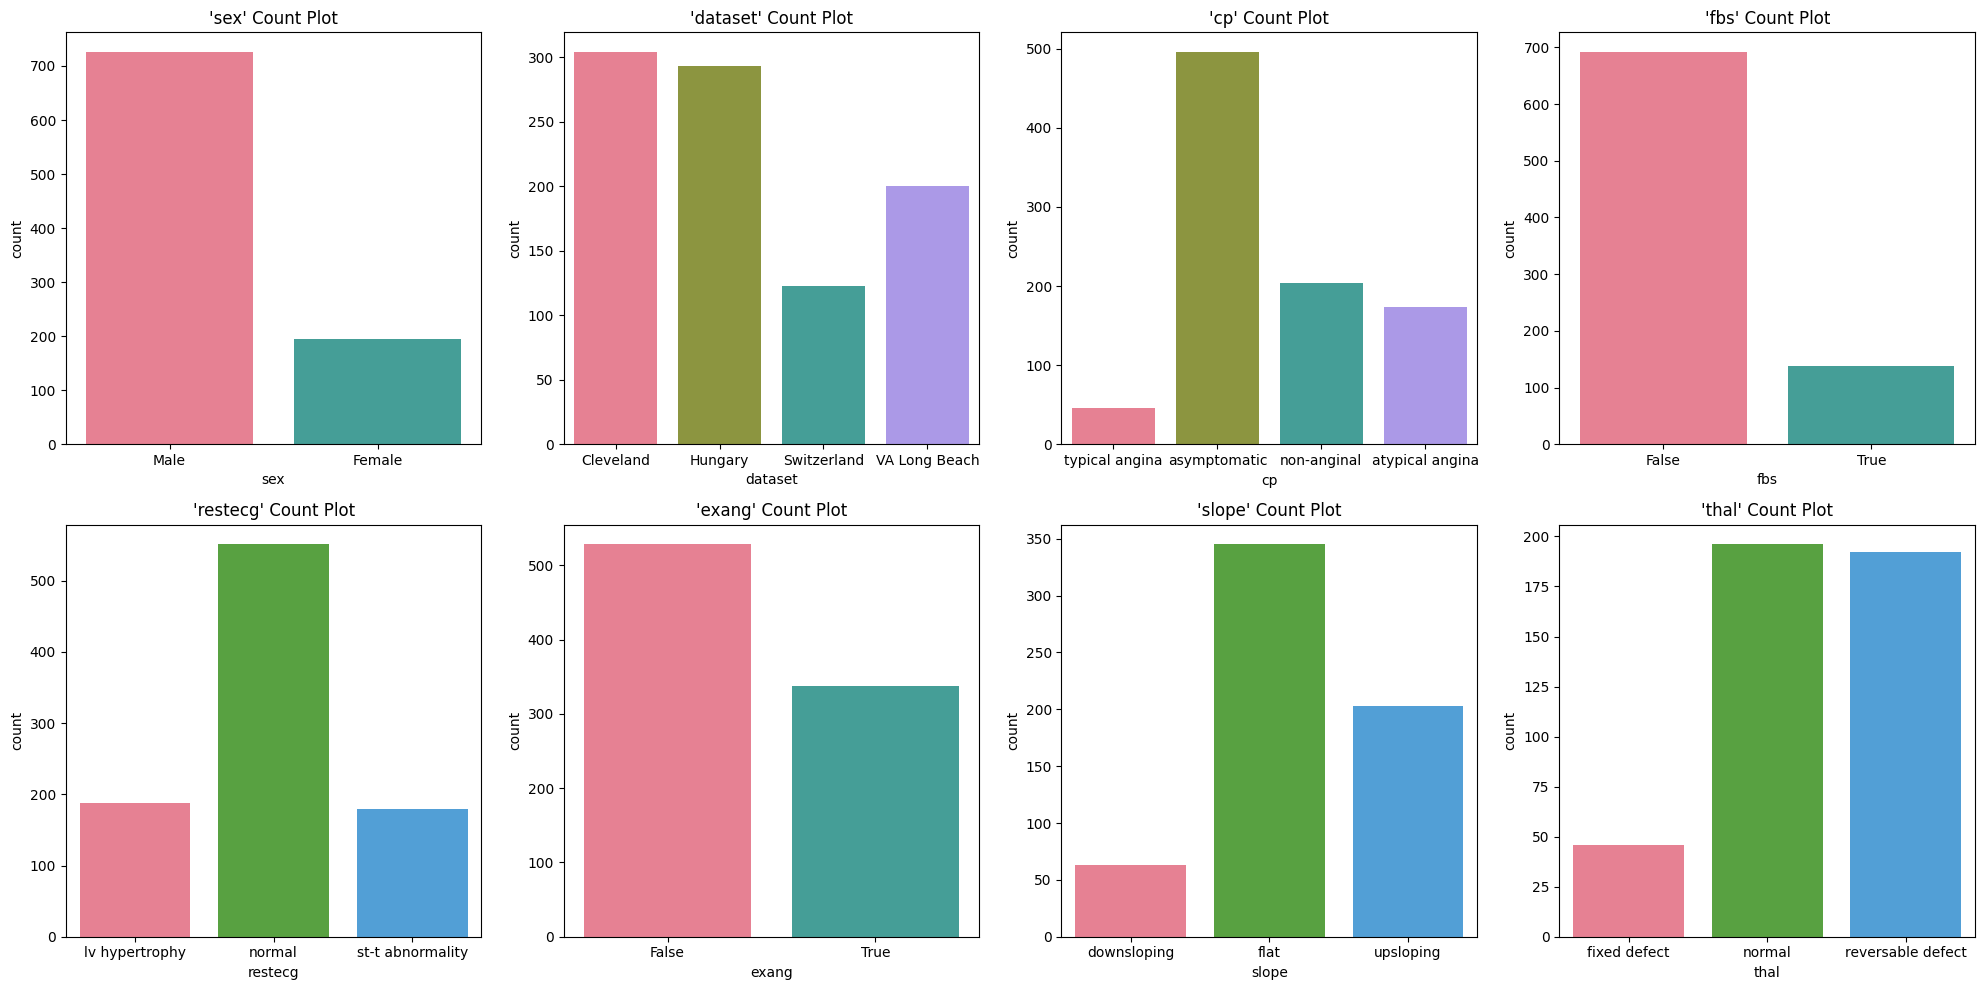

In [30]:
# Visualize the distribution of categorical variables
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Create count plots for each feature
for i, feature in enumerate(cat_cols):
    sns.countplot(x=feature, data=df, ax=axes[i], palette='husl')
    axes[i].set_title("'"+ feature +"' Count Plot")

plt.tight_layout()
plt.show()

+ Categories are imbalance in each feature.

&emsp;**3.0.4 - Inspect Numerical Features**

In [31]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [32]:
# Select only numerical columns for analysis
numeric_columns = df.select_dtypes(include='number').columns

def quartile_ranges(df):
    
    # Initialize a dictionary to store results
    quartile_ranges_dict = {}

    # Iterate over numerical columns
    for column in numeric_columns:
        # Calculate quartile values
        q1 = df[column].describe()['25%']
        q2 = df[column].describe()['50%']
        q3 = df[column].describe()['75%']

        # Count observations in each quartile range
        min_to_q1 = df[(df[column] >= df[column].min()) & (df[column] <= q1)].shape[0]
        q1_to_q2 = df[(df[column] > q1) & (df[column] <= q2)].shape[0]
        q2_to_q3 = df[(df[column] > q2) & (df[column] <= q3)].shape[0]
        q3_to_max = df[(df[column] > q3) & (df[column] <= df[column].max())].shape[0]

        # Store results in the dictionary
        quartile_ranges_dict[column] = {
            'In Q_1': min_to_q1,
            'In Q_2': q1_to_q2,
            'In Q_3': q2_to_q3,
            'In Q_4': q3_to_max
        }

    return quartile_ranges_dict
print('Number of Observations in each Quartile\n')
for col in numeric_columns:
    print("For '"+ col+ "':", quartile_ranges(df)[col], "\n")

Number of Observations in each Quartile

For 'id': {'In Q_1': 230, 'In Q_2': 230, 'In Q_3': 230, 'In Q_4': 230} 

For 'age': {'In Q_1': 239, 'In Q_2': 233, 'In Q_3': 227, 'In Q_4': 221} 

For 'trestbps': {'In Q_1': 293, 'In Q_2': 195, 'In Q_3': 164, 'In Q_4': 209} 

For 'chol': {'In Q_1': 224, 'In Q_2': 223, 'In Q_3': 222, 'In Q_4': 221} 

For 'thalch': {'In Q_1': 243, 'In Q_2': 219, 'In Q_3': 188, 'In Q_4': 215} 

For 'oldpeak': {'In Q_1': 382, 'In Q_2': 57, 'In Q_3': 210, 'In Q_4': 209} 

For 'ca': {'In Q_1': 181, 'In Q_2': 0, 'In Q_3': 67, 'In Q_4': 61} 

For 'num': {'In Q_1': 411, 'In Q_2': 265, 'In Q_3': 109, 'In Q_4': 135} 



In [33]:
# Calculate the number of observations where the 'trestbps' value is 0.
df['trestbps'][df['trestbps'] == 0].count()

1

In [34]:
# Calculate the number of observations where the 'chol' value is 0.
df['chol'][df['chol'] == 0].count()

172

In [35]:
print("Unique Values in 'ca' Column:",df['ca'].unique(),"\n")
print("Value Counts of the Column",df['ca'].value_counts())

Unique Values in 'ca' Column: [ 0.  3.  2.  1. nan] 

Value Counts of the Column ca
0.0    181
1.0     67
2.0     41
3.0     20
Name: count, dtype: int64


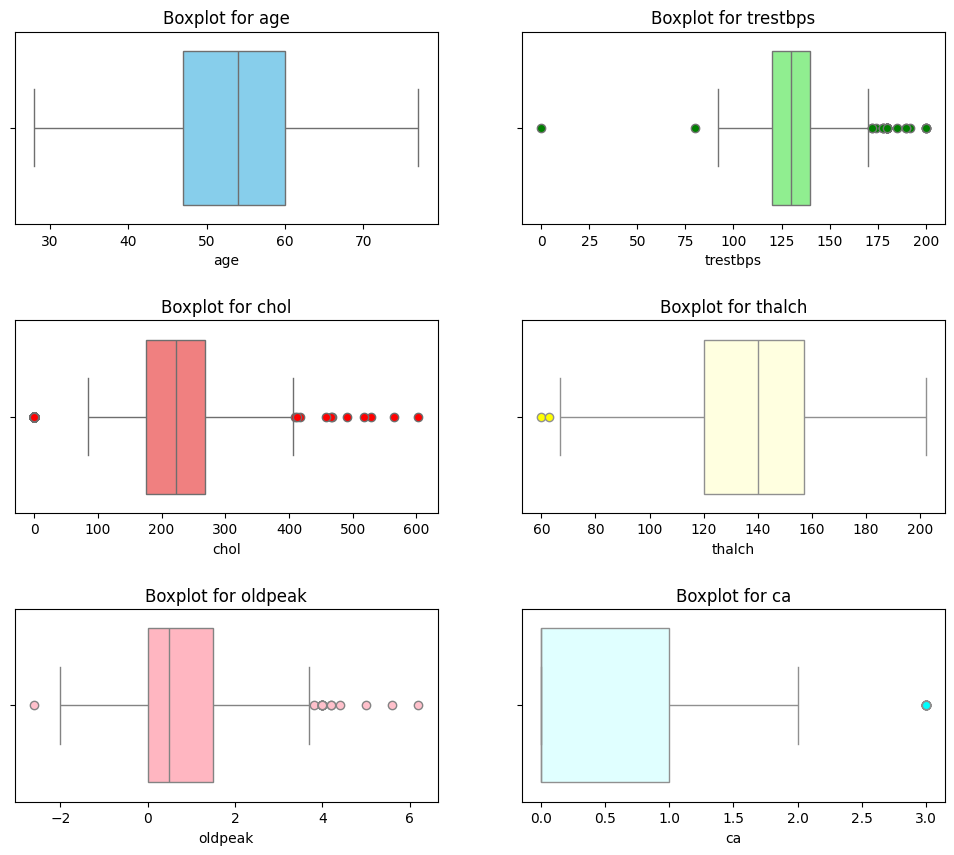

In [36]:
# Assuming you have a DataFrame named 'df' containing the data

boxplot_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.5)

# Define custom colors for boxes and outliers
box_colors = ["skyblue", "lightgreen", "lightcoral", "lightyellow", "lightpink", "lightcyan"]
outlier_colors = ["blue", "green", "red", "yellow", "pink", "cyan"]

# Plot boxplots for each numeric column with custom colors
for i, column in enumerate(boxplot_columns):
    row = i // 2
    col = i % 2
    sns.boxplot(x=df[column], ax=axes[row, col], color=box_colors[i], boxprops=dict(facecolor=box_colors[i]),
                flierprops=dict(markerfacecolor=outlier_colors[i], marker="o")).set(title=f'Boxplot for {column}')

# Show the plots
plt.show()

&emsp;**Observations - 3.0.4**
> + The minimum value of the featue `'trestbps'` (resting blood pressure) is `0` which is not possible.
>   + We observe there is `0` at one place, which need to be replace with `mean` or `median`.
>
> + The minimum value of the feature `'chol'` (cholesterol) is `0`, which is not possible.
>   + We observe there is `0` at `172` places, which need to be replace with `mean`/`median` or consider the zero values as missing data and use any other technique to replace these values.
> 
> + The feature `ca` considered to be ordinal.
> 
>   + The values `'0'`, `'1'`, `'2'`, and `'3'` can be arranged in a specific order based on the `increasing number of vessels colored`.
>   + The ordering from `0 to 3` signifies an `increase in the severity` or extent of the condition being measured.
>   + We need to convert the data type of `ca` feature from `float` to `int`.
>
> + The `outliers` exist in the features [`'trestbps'`, `'chol'`, `'thalch'`, `'oldpeak'`]. We need to find a way to handle the outliers witout `deleting` or `capping` them.

## 4.0 - Data Preprocessing

&emsp;**4.0.1 - Drop the Irrelevant Features based on the `Observation - 3.0.1`**

In [37]:
# Drop the columns 'id' and 'dataset' from the dataframe.
df.drop(['id'], axis=1, inplace=True)

&emsp;**4.0.2 - Clean Categorical Features**

+ Clean the features [``cp``, `'restecg'`, `'thal'`] based on the `Observations 3.0.3`.

In [38]:
# Map the values in the 'cp' column. 
# i.e. 'typical angina' to 'typical-angina', 'atypical angina' to 'atypical-angina'.
df['cp'] = df['cp'].map({'typical angina': 'typical-angina', 'asymptomatic': 'asymptomatic', 'non-anginal': 'non-anginal', 'atypical angina': 'atypical-angina'})

# Map the values in the 'restecg' column.
df['restecg'] = df['restecg'].map({'lv hypertrophy': 'lv-hypertrophy', 'normal': 'normal', 'st-t abnormality': 'st-t-abnormality'})

# Map the values in the 'thal' column.
df['thal'] = df['thal'].map({'normal': 'normal', 'fixed defect': 'fixed-defect', 'reversable defect': 'reversable-defect'})

# Map the values in the 'dataset' column.
df['dataset'] = df['dataset'].map({'Cleveland': 'Cleveland', 'Hungary': 'Hungary', 'Switzerland': 'Switzerland', 'VA Long Beach': 'VA-Long-Beach'})

In [39]:
# Verify the values in categorical column cleared from noiseness.
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'category':
        print(col, ":", df[col].unique(), '\n')

sex : ['Male' 'Female'] 

dataset : ['Cleveland' 'Hungary' 'Switzerland' 'VA-Long-Beach'] 

cp : ['typical-angina' 'asymptomatic' 'non-anginal' 'atypical-angina'] 

fbs : [True False nan] 

restecg : ['lv-hypertrophy' 'normal' 'st-t-abnormality' nan] 

exang : [False True nan] 

slope : ['downsloping' 'flat' 'upsloping' nan] 

thal : ['fixed-defect' 'normal' 'reversable-defect' nan] 



&emsp;**4.0.3 - Clean Numerical Features**

+ Based on the `Observations 3.0.4`, replace the `zero values` in the features [``trestbps``, `'chol'`] with `NaN values`.

In [40]:
cols_need_to_clean = ['trestbps', 'chol']

for col in cols_need_to_clean:
    print("Zero values in '"+ col+ "'=",df[col][df[col]==0].count())

Zero values in 'trestbps'= 1
Zero values in 'chol'= 172


In [41]:
# replace the zero values in 'trestbps' and 'chol' with NaN.
for col in cols_need_to_clean:
    df[col][df[col] == 0] = np.nan

In [42]:
# Verify the 'Zero' values in 'trestbps' and 'chol' replaced with NaN.
for col in cols_need_to_clean:
    print("Zero values in '"+ col+ "'=",df[col][df[col]==0].count())

Zero values in 'trestbps'= 0
Zero values in 'chol'= 0


&emsp;**4.0.4 - Handling Missing Data**

+ Impute the Features having Missing Values by using `RandomForestClassifier`.

In [43]:
# Identify the columns in which the data is missing.
round((df.isnull().sum()[df.isnull().sum()>0]/len(df)*100),1).sort_values(ascending=False)

ca          66.4
thal        52.8
slope       33.6
chol        22.0
fbs          9.8
oldpeak      6.7
trestbps     6.5
thalch       6.0
exang        6.0
restecg      0.2
dtype: float64

In [44]:
# identify the features with missing values in more than 10%
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()

# reverse the list of missing data cols
# missing_data_cols = missing_data_cols.reverse()

In [45]:
classifier_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
regressor_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [46]:
def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    # print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    # print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [47]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

ca          611
thal        486
slope       309
chol        202
fbs          90
oldpeak      62
trestbps     60
thalch       55
exang        55
restecg       2
dtype: int64

In [48]:
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in classifier_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in regressor_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass


Missing Values trestbps : 6.52%
MAE = 13.261162790697675 

Missing Values chol : 21.96%
MAE = 41.34819444444444 

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 80.72 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 65.22 accuracy

Missing Values thalch : 5.98%
MAE = 16.923699421965317 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 78.03 accuracy

Missing Values oldpeak : 6.74%
MAE = 0.5791976744186047 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 66.67 accuracy

Missing Values ca : 66.41%
The feature 'ca' has been imputed with 62.9 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 68.97 accuracy



In [49]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  920 non-null    float64
 5   chol      920 non-null    float64
 6   fbs       920 non-null    object 
 7   restecg   920 non-null    object 
 8   thalch    920 non-null    float64
 9   exang     920 non-null    object 
 10  oldpeak   920 non-null    float64
 11  slope     920 non-null    object 
 12  ca        920 non-null    float64
 13  thal      920 non-null    object 
 14  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 107.9+ KB


&emsp;**4.0.5 - Handle Outliers**

Based on the `Observation 3.0.4`, We need to handle the `outliers` in the features [`'trestbps'`, `'chol'`, `'thalch'`, `'oldpeak'`].

In [51]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,53.510870,132.578902,256.005826,137.073978,0.975634,0.477174,0.995652
std,9.424685,18.000869,59.637416,25.319309,1.122157,0.770456,1.142693
min,28.000000,80.000000,85.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,216.750000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,247.685000,138.000000,0.800000,0.000000,1.000000
75%,60.000000,140.000000,288.000000,156.000000,1.900000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


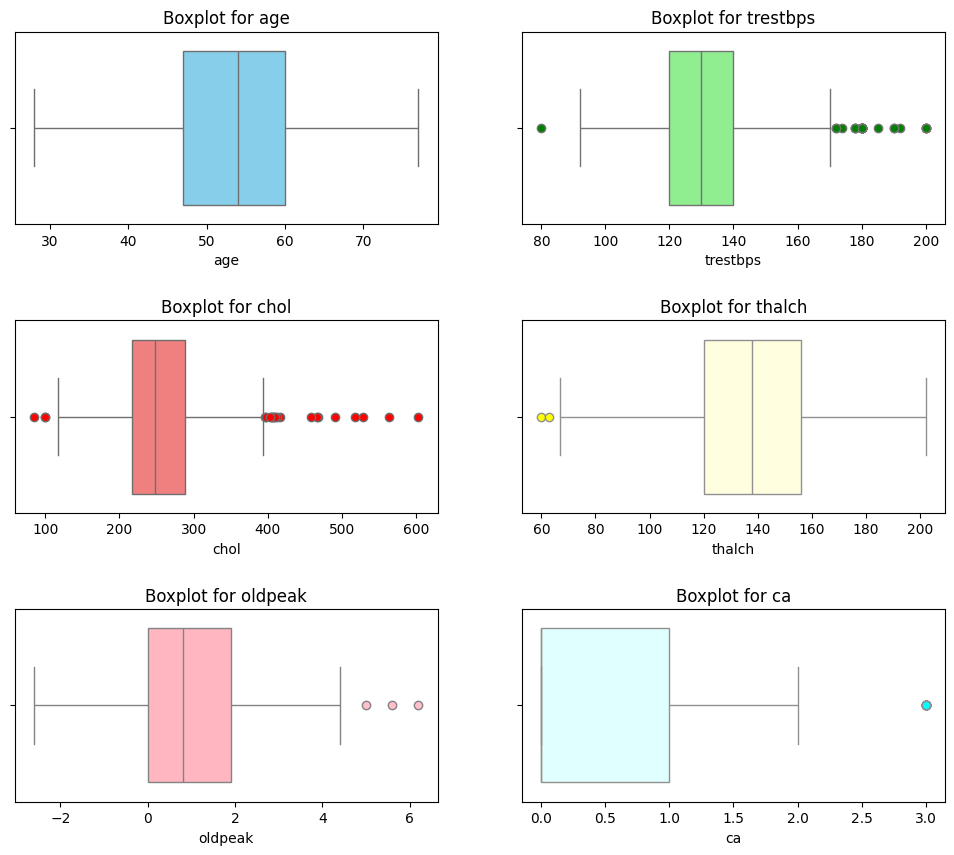

In [52]:
# Assuming you have a DataFrame named 'df' containing the data

boxplot_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.5)

# Define custom colors for boxes and outliers
box_colors = ["skyblue", "lightgreen", "lightcoral", "lightyellow", "lightpink", "lightcyan"]
outlier_colors = ["blue", "green", "red", "yellow", "pink", "cyan"]

# Plot boxplots for each numeric column with custom colors
for i, column in enumerate(boxplot_columns):
    row = i // 2
    col = i % 2
    sns.boxplot(x=df[column], ax=axes[row, col], color=box_colors[i], boxprops=dict(facecolor=box_colors[i]),
                flierprops=dict(markerfacecolor=outlier_colors[i], marker="o")).set(title=f'Boxplot for {column}')

# Show the plots
plt.show()

In [53]:
# List of features for boxplots
binning_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

# Define a function to create bins based on specified instructions
def create_bins(col):
    series = df[col]
    q1 = series.quantile(0.25)
    q2 = series.quantile(0.5)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    if col == 'age':
        bins = [10, 20, lower_bound, q1, q2, q3, upper_bound, 90, 110]
    elif col=='trestbps':
        bins = [40, series.min(), lower_bound, q1, q2, q3, upper_bound, series.max(), 300]
    elif col=='chol':
        bins = [50, series.min(), lower_bound, q1, q2, q3, upper_bound, series.max(), 800]
    elif col=='thalch':
        bins = [30, series.min(), lower_bound, q1, q2, q3, upper_bound, 250, 300]
    elif col=='oldpeak':
        bins = [-10, series.min(), -1.3, q1, q2, q3, upper_bound, series.max(), 10]
    else:
        pass

    return bins

# Bin the features based on the specified bin edges
for col in binning_columns:
    bins = create_bins(col)
    df[col] = pd.cut(df[col], bins=bins, labels=False, include_lowest=True)

In [54]:
# Display the head rows, after modified continuous features with binned values.
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,5,Male,Cleveland,typical-angina,5,3,True,lv-hypertrophy,4,False,5,downsloping,0.0,fixed-defect,0
1,5,Male,Cleveland,asymptomatic,5,4,False,lv-hypertrophy,2,True,4,flat,3.0,normal,2
2,5,Male,Cleveland,asymptomatic,2,3,False,lv-hypertrophy,3,True,5,flat,2.0,reversable-defect,1
3,2,Male,Cleveland,non-anginal,3,4,False,normal,5,False,5,downsloping,0.0,normal,0
4,2,Female,Cleveland,atypical-angina,3,2,False,lv-hypertrophy,5,False,4,upsloping,0.0,normal,0


&emsp;**4.0.6 - Encode the Categorical Features**

+ Apply the `LabelEncoder` to the categorical features.

In [55]:
# Apply label encoder to the categorical features.
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding the categorical features by using for loop.
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype=='category':
        df[col] = label_encoder.fit_transform(df[col])

# Display the modified dataframe
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,5,1,0,3,5,3,1,0,4,0,5,0,0.0,0,0
1,5,1,0,0,5,4,0,0,2,1,4,1,3.0,1,2
2,5,1,0,0,2,3,0,0,3,1,5,1,2.0,2,1
3,2,1,0,2,3,4,0,1,5,0,5,0,0.0,1,0
4,2,0,0,1,3,2,0,0,5,0,4,2,0.0,1,0


In [56]:
# Covert the data type of 'ca' column from float to int.
df['ca'] = df['ca'].astype(int)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       920 non-null    int64
 1   sex       920 non-null    int32
 2   dataset   920 non-null    int32
 3   cp        920 non-null    int32
 4   trestbps  920 non-null    int64
 5   chol      920 non-null    int64
 6   fbs       920 non-null    int32
 7   restecg   920 non-null    int32
 8   thalch    920 non-null    int64
 9   exang     920 non-null    int32
 10  oldpeak   920 non-null    int64
 11  slope     920 non-null    int32
 12  ca        920 non-null    int32
 13  thal      920 non-null    int32
 14  num       920 non-null    int64
dtypes: int32(9), int64(6)
memory usage: 75.6 KB


#### Here, The Dataset is ready to apply any ML Model.